# G2M insight for Cab Investment firm Project





In [1]:
import pandas as pd

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Reading Data

In [2]:
cab_data=pd.read_csv("datasets/Cab_Data.csv")
customer_id=pd.read_csv("datasets/Customer_ID.csv")
transaction_id=pd.read_csv("datasets/Transaction_ID.csv")
city=pd.read_csv("datasets/City.csv")


# Cab data

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


# Transaction_id data

In [4]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


# City data

In [4]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


# Customer id data

In [5]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


# Check the shape of whole dataset

In [7]:
print("shape of Cab_Data", cab_data.shape)
print("shape of Customer_ID", customer_id.shape)
print("shape of Transaction_ID", transaction_id.shape)
print("shape of City Data", city.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


# Check the basic information 

In [8]:
print(cab_data.info())
print("-----------------------")
print(customer_id.info())
print("-----------------------")
print(transaction_id.info())
print("-----------------------")
print(city.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-n

# Merge cab data and transaction Id based on transaction id

In [4]:
cab_transaction_data=cab_data.merge(transaction_id, how="inner" , on="Transaction ID")

cab_transaction_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


# Cab_data transaction id and city data join based on city

In [5]:
cab_transaction_city_data=cab_transaction_data.merge(city, how="inner", on="City")

cab_transaction_city_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,"418,859","127,001"
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,"418,859","127,001"
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,"418,859","127,001"
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,"418,859","127,001"


# Cab transaction id city and customer id data merged based on customer id

In [6]:
master_data=cab_transaction_city_data.merge(customer_id, how="inner", on="Customer ID")

master_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701",Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,"814,885","24,701",Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,"814,885","24,701",Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701",Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,"814,885","24,701",Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,"418,859","127,001",Female,29,6829
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,"418,859","127,001",Female,29,6829
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,"418,859","127,001",Female,29,6829
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,"418,859","127,001",Female,29,6829


# Master data info

In [7]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Population          359392 non-null  object 
 10  Users               359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


# The number of  duplicate values in master data

In [8]:
master_data.duplicated().sum()

0

# The number of Nan values in master data

In [9]:
master_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Population            0
Users                 0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

# Remove Outlier KM travelled values based on z score method

In [10]:
master_data["KM Travelled"]=stats.zscore(master_data["KM Travelled"])

master_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,0.644357,370.95,313.6350,29290,Card,"814,885","24,701",Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,0.296133,598.70,317.4228,29290,Cash,"814,885","24,701",Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,1.633444,792.05,597.4020,29290,Card,"814,885","24,701",Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,0.494768,358.52,334.8540,27703,Card,"814,885","24,701",Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,1.129091,721.10,467.1192,27703,Card,"814,885","24,701",Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,1.294211,668.93,525.3120,51406,Cash,"418,859","127,001",Female,29,6829
359388,10319775,43203,Yellow Cab,WASHINGTON DC,-1.552887,67.60,44.5536,51406,Cash,"418,859","127,001",Female,29,6829
359389,10347676,43287,Yellow Cab,WASHINGTON DC,0.072975,331.97,337.8240,51406,Card,"418,859","127,001",Female,29,6829
359390,10358624,43314,Yellow Cab,WASHINGTON DC,0.411390,358.23,364.3200,51406,Cash,"418,859","127,001",Female,29,6829


# Remove Outlier km travelled column visualize box plotting

/Users/baris/opt/anaconda3/envs/homev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='KM Travelled'>

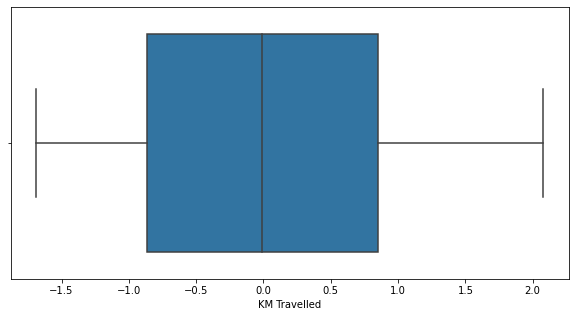

In [11]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(master_data["KM Travelled"])

# Remove Outlier Price charged values based on z score method

In [12]:
master_data["Price Charged"]=stats.zscore(master_data["Price Charged"])

master_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,0.644357,-0.191317,313.6350,29290,Card,"814,885","24,701",Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,0.296133,0.638741,317.4228,29290,Cash,"814,885","24,701",Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,1.633444,1.343424,597.4020,29290,Card,"814,885","24,701",Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,0.494768,-0.236620,334.8540,27703,Card,"814,885","24,701",Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,1.129091,1.084840,467.1192,27703,Card,"814,885","24,701",Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,1.294211,0.894701,525.3120,51406,Cash,"418,859","127,001",Female,29,6829
359388,10319775,43203,Yellow Cab,WASHINGTON DC,-1.552887,-1.296907,44.5536,51406,Cash,"418,859","127,001",Female,29,6829
359389,10347676,43287,Yellow Cab,WASHINGTON DC,0.072975,-0.333384,337.8240,51406,Card,"418,859","127,001",Female,29,6829
359390,10358624,43314,Yellow Cab,WASHINGTON DC,0.411390,-0.237676,364.3200,51406,Cash,"418,859","127,001",Female,29,6829


# Count price charged outlier data 

In [13]:
lower_range=3
upper_range=7
count_outlier=len(master_data[~((master_data["Price Charged"]<lower_range)) | (master_data["Price Charged"]<upper_range)])

count_outlier

359392

# Remove Outlier price charged column visualize box plotting

/Users/baris/opt/anaconda3/envs/homev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price Charged'>

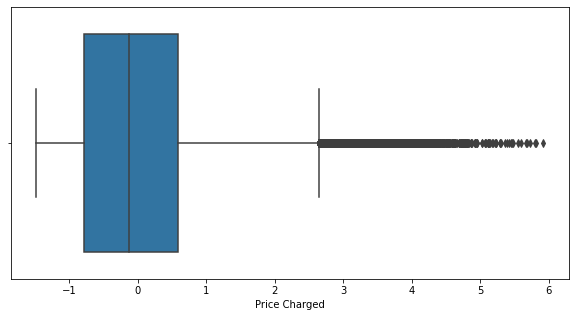

In [14]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(master_data["Price Charged"])

# Remove Outlier Cost of trip values based on z score method

In [15]:
master_data["Cost of Trip"]=stats.zscore(master_data["Cost of Trip"])

master_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,0.644357,-0.191317,0.173709,29290,Card,"814,885","24,701",Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,0.296133,0.638741,0.197683,29290,Cash,"814,885","24,701",Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,1.633444,1.343424,1.969777,29290,Card,"814,885","24,701",Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,0.494768,-0.236620,0.308012,27703,Card,"814,885","24,701",Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,1.129091,1.084840,1.145168,27703,Card,"814,885","24,701",Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,1.294211,0.894701,1.513492,51406,Cash,"418,859","127,001",Female,29,6829
359388,10319775,43203,Yellow Cab,WASHINGTON DC,-1.552887,-1.296907,-1.529409,51406,Cash,"418,859","127,001",Female,29,6829
359389,10347676,43287,Yellow Cab,WASHINGTON DC,0.072975,-0.333384,0.326810,51406,Card,"418,859","127,001",Female,29,6829
359390,10358624,43314,Yellow Cab,WASHINGTON DC,0.411390,-0.237676,0.494513,51406,Cash,"418,859","127,001",Female,29,6829


# Remove Outlier Cost of Trip column visualize box plotting

/Users/baris/opt/anaconda3/envs/homev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cost of Trip'>

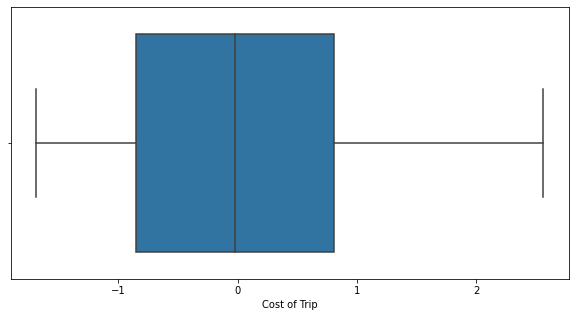

In [16]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(master_data["Cost of Trip"])

# Save Master data 

In [17]:
master_data.to_csv("datasets/master_data.csv")